In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import mahotas as mh
from PIL import Image,ImageOps,ImageFilter
import colorsys

plt.rcParams['figure.figsize'] = (10.0, 8.0)

from skimage import data, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max, canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
import skimage as ski

(6000, 4000) RGB


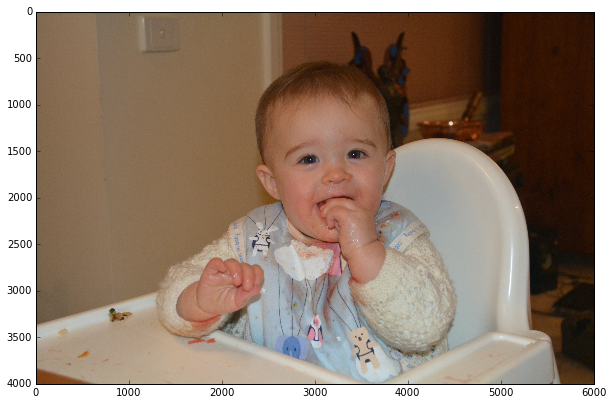

In [2]:
cgv = Image.open('cgv.JPG')
plt.imshow(cgv)
print(cgv.size,cgv.mode)

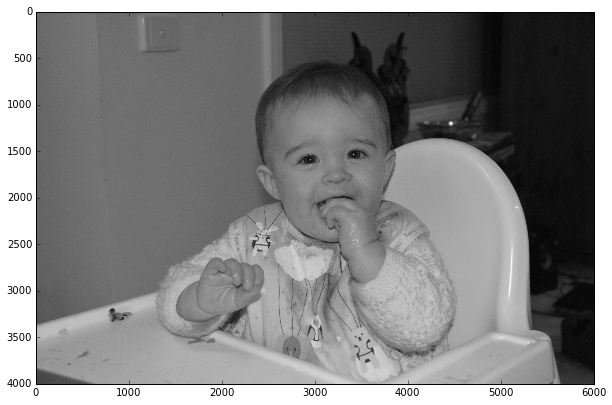

In [3]:
cgv_gray = cgv.convert('L')
plt.gray()
plt.imshow(cgv_gray)

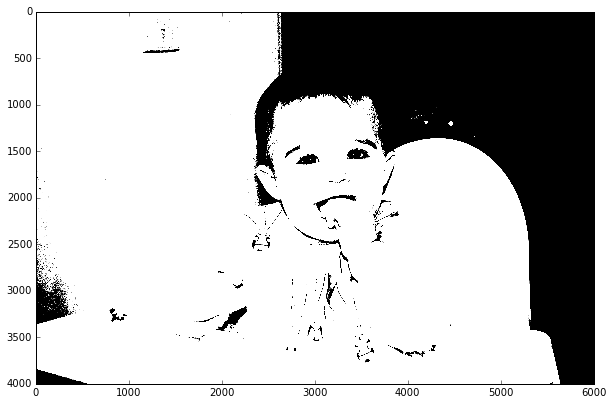

In [4]:
Thold = 100;
cgv_bw = cgv_gray.point(lambda x: 0 if x<Thold else 255, '1')
plt.imshow(cgv_bw)

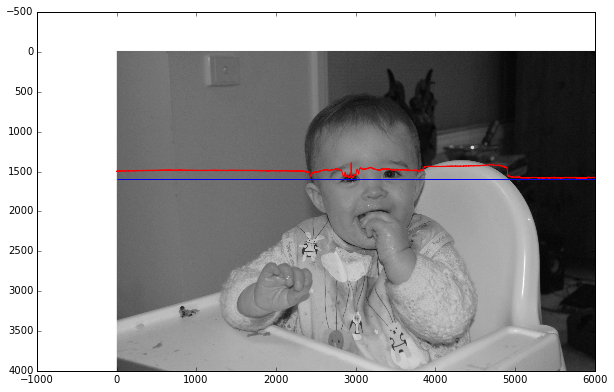

In [5]:
pix = np.array(cgv_gray)
plt.imshow(cgv_gray)
plt.hlines(1600,xmin=0,xmax=6000,color='b')
plt.plot(1600-pix[1600,:],'r')


In [6]:
cgv_hsv = ski.color.rgb2hsv(cgv)

In [7]:
cgv_h = np.reshape(cgv_hsv[:,:,0],-1,1)
cgv_s = np.reshape(cgv_hsv[:,:,1],-1,1)
cgv_v = np.reshape(cgv_hsv[:,:,2],-1,1)

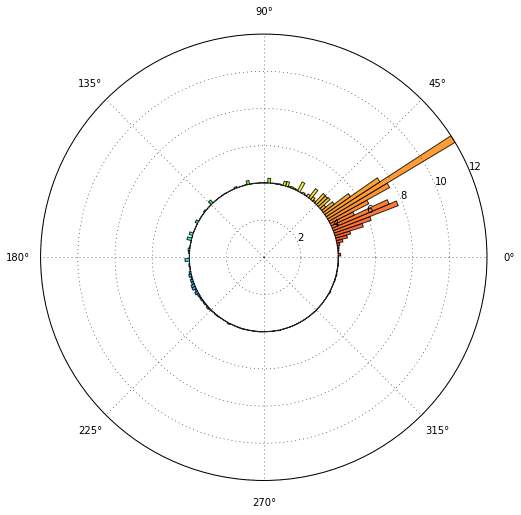

In [8]:
bottom = 4
max_height = 8
n, bins, patches = plt.hist(cgv_h, 180, normed=1, histtype='stepfilled')

theta = (bins[:-1]+bins[1:])/max(bins)*np.pi
radii = max_height*(n)/max(n)
width = (2*np.pi) / len(radii)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)
i = -1

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    i = i + 1
    col = colorsys.hsv_to_rgb(theta[i]/(2*np.pi),1,1)
    bar.set_facecolor(col)
    bar.set_alpha(0.8)

plt.show()

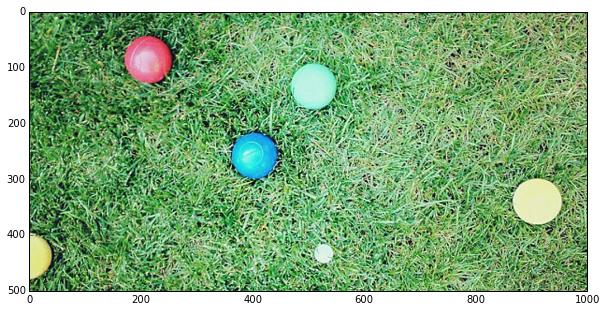

In [2]:
bow = ski.io.imread('bocce.jpg')
bow = bow[200:700,0:1000]
#bow = Image.open('lawnbowls.png')
plt.imshow(bow)

/usr/local/lib/python3.4/site-packages/skimage/filters/_gaussian.py:94: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warnings.warn(RuntimeWarning(msg))


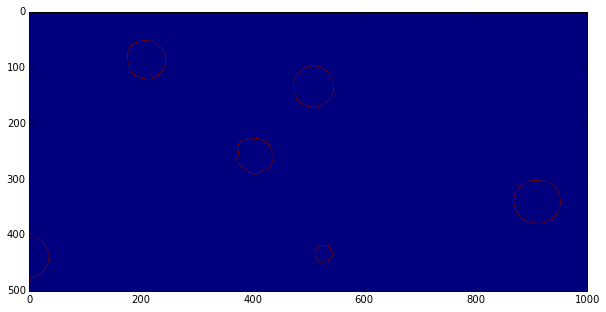

In [3]:
image = ski.filters.gaussian_filter(bow,10)
#image = ski.color.rgb2gray(image)
image = image[:,:,0] + image[:,:,2] + image[:,:,1]
plt.imshow(canny(image, sigma=3))

/usr/local/lib/python3.4/site-packages/skimage/filters/_gaussian.py:94: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warnings.warn(RuntimeWarning(msg))


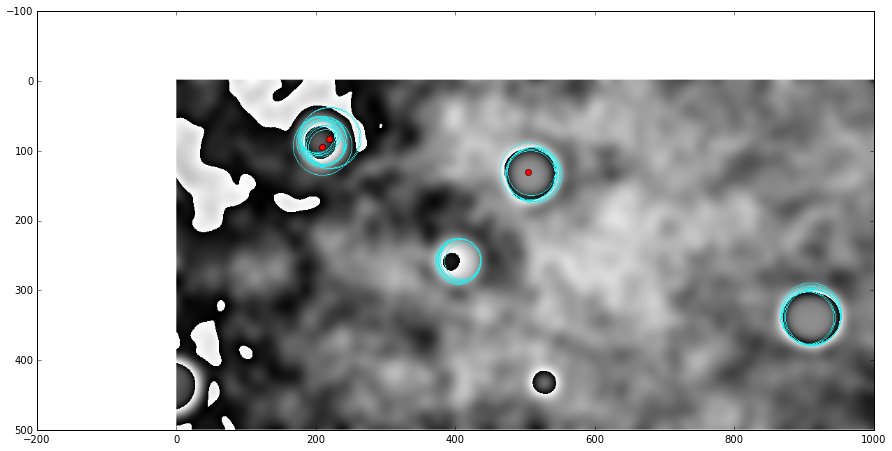

In [250]:
#image = ski.color.rgb2gray(bow)
#image = bow[:,:,0] + bow[:,:,2] + bow[:,:,1]
image = ski.filters.gaussian_filter(bow,10)
image = image[:,:,0] + image[:,:,2] + image[:,:,1]

edges = canny(image, sigma=3)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 12))

# Detect two radii
hough_radii = np.arange(25, 45, 1)
hough_res = hough_circle(edges, hough_radii)

centers = []
accums = []
radii = []

for radius, h in zip(hough_radii, hough_res):
    # For each radius, extract two circles
    num_peaks = 2
    peaks = peak_local_max(h, num_peaks=num_peaks)
    centers.extend(peaks)
    accums.extend(h[peaks[:, 0], peaks[:, 1]])
    radii.extend([radius] * num_peaks)

# Draw the most prominent 5 circles
image = color.gray2rgb(image)
for idx in np.argsort(accums)[::-1][:100]:
    center_x, center_y = centers[idx]
    radius = radii[idx]
    cx, cy = circle_perimeter(center_y, center_x, radius)
    image[cy, cx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)

for i in np.argsort(accums)[0:4]:
    plt.plot(centers[i][1],centers[i][0],'ro')